In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import ADASYN

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('Data/titanic_cleaned.csv')
df.head()

,pclass,survived,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,1,0,0,211.3375,1,29.0000,0.0,0,0,1,1
1,1,1,1,2,151.5500,1,0.9167,0.0,1,0,1,0
2,1,0,1,2,151.5500,1,2.0000,0.0,0,0,1,0
3,1,0,1,2,151.5500,0,30.0000,0.0,1,0,1,1
4,1,0,1,2,151.5500,1,25.0000,0.0,0,0,1,1


In [13]:
df.survived.value_counts()/df.shape[0]

0    0.618683
1    0.381317
Name: survived, dtype: float64

In [3]:
target = ['survived']

x, y = df.drop(columns = target), df[target]

In [4]:
x.shape, y.shape

((1306, 11), (1306, 1))

In [7]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y, test_size = 0.3, random_state = 64, stratify = y)

In [8]:
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((914, 11), (392, 11), (914, 1), (392, 1))

In [11]:
y_tr.survived.value_counts()/y_tr.shape[0]

0    0.618162
1    0.381838
Name: survived, dtype: float64

In [12]:
y_ts.survived.value_counts()/y_ts.shape[0]

0    0.619898
1    0.380102
Name: survived, dtype: float64

In [17]:
# Initialising the DT classifier model
dtc = DecisionTreeClassifier()

# Training the model
dtc.fit(x_tr, y_tr)

# Predicting using the model
y_pred = dtc.predict(x_ts)

# Predicting probabilities using the model
y_pred_prob = dtc.predict_proba(x_ts)

# Test Results

In [20]:
# tn, fp, fn, tp
confusion_matrix(y_ts, y_pred)

array([[189,  54],
       [ 45, 104]])

In [31]:
precision_score(y_ts, y_pred, average='weighted')

0.7508805615722433

In [30]:
recall_score(y_ts, y_pred, average='weighted')

0.7474489795918368

In [29]:
f1_score(y_ts, y_pred, average='weighted')

0.7487683107168256

In [28]:
print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       243
           1       0.66      0.70      0.68       149

    accuracy                           0.75       392
   macro avg       0.73      0.74      0.73       392
weighted avg       0.75      0.75      0.75       392



# Train Results

In [32]:
y_pred_tr = dtc.predict(x_tr)

y_pred_prob_tr = dtc.predict_proba(x_tr)

In [33]:
# tn, fp, fn, tp
confusion_matrix(y_tr, y_pred_tr)

array([[561,   4],
       [ 16, 333]])

In [34]:
precision_score(y_tr, y_pred_tr, average='weighted')

0.9783263921205263

In [35]:
recall_score(y_tr, y_pred_tr, average='weighted')

0.9781181619256017

In [36]:
f1_score(y_tr, y_pred_tr, average='weighted')

0.9780417414610548

In [37]:
print(classification_report(y_tr, y_pred_tr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       565
           1       0.99      0.95      0.97       349

    accuracy                           0.98       914
   macro avg       0.98      0.97      0.98       914
weighted avg       0.98      0.98      0.98       914



In [52]:
dtc.get_depth()

20

In [42]:
# Plotting the decision tree
plt.figure(figsize=(250,250), dpi = 60)
plot_tree(dtc)
plt.show()

# Hyper-parameter tuning of the DTC

In [ ]:
criterion='gini',
splitter='best',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,

In [64]:
# Get all the possible scorer names for tuning
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [201]:
# Defining the parameters grid to perform the tuning on
params_grid = {'criterion':["gini", "entropy", "log_loss"], 
               'splitter':["best", "random"], 
               'max_depth' : np.arange(7, 20), 
               'min_samples_split' : np.arange(10, 31, 2), 
               'min_samples_leaf' : np.arange(5, 11)}

# Defining the base model
base_model = DecisionTreeClassifier(random_state = 64)

# Generating the tuning object
gscv = GridSearchCV(estimator = base_model, 
                    param_grid = params_grid, 
                    scoring = 'recall_weighted', 
                    cv = 7,
                    n_jobs = -1, 
                    return_train_score = True)

# Searching over all the possible configurations
gscv.fit(x_tr, y_tr)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=64), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='recall_weighted')

In [202]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=30,
                       random_state=64, splitter='random')

In [203]:
gscv.best_score_

0.8347957386125325

In [204]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 30,
 'splitter': 'random'}

## Finding the best possible model

In [205]:
scores = pd.DataFrame(gscv.cv_results_)

In [206]:
scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_splitter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [207]:
scores = scores[['mean_score_time','param_criterion', 'param_max_depth', 'param_min_samples_leaf','param_min_samples_split', 'param_splitter', 'params', 'mean_test_score','rank_test_score', 'mean_train_score']]

In [208]:
scores['score_dev'] = scores.mean_train_score - scores.mean_test_score

In [209]:
scores = scores.sort_values(['rank_test_score', 'score_dev', 'mean_test_score', 'mean_train_score']).reset_index(drop = True)

In [210]:
scores.head(40)

,mean_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,mean_test_score,rank_test_score,mean_train_score,score_dev
0,0.001040,gini,9,6,30,random,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.834796,1,0.839715,0.004919
1,0.001412,gini,15,7,30,random,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.831533,2,0.840992,0.009459
2,0.000690,gini,15,8,30,random,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.831516,3,0.840628,0.009112
3,0.001177,gini,16,8,30,random,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.831516,3,0.840628,0.009112
4,0.001423,gini,17,8,30,random,"{'criterion': 'gini', 'max_depth': 17, 'min_sa...",0.831516,3,0.840628,0.009112
5,0.001210,gini,18,8,30,random,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.831516,3,0.840628,0.009112
6,0.000723,gini,19,8,30,random,"{'criterion': 'gini', 'max_depth': 19, 'min_sa...",0.831516,3,0.840628,0.009112
7,0.000723,entropy,9,8,30,random,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.830425,8,0.837347,0.006922
8,0.001029,log_loss,9,8,30,random,"{'criterion': 'log_loss', 'max_depth': 9, 'min...",0.830425,8,0.837347,0.006922
9,0.000703,gini,14,7,30,random,"{'criterion': 'gini', 'max_depth': 14, 'min_sa...",0.829352,10,0.840809,0.011458


In [224]:
best_params = scores.iloc[21].params
best_params

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 8,
 'min_samples_split': 30,
 'splitter': 'random'}

In [225]:
maybe_best_model = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 15,
                                          min_samples_leaf = 8,
                                          min_samples_split = 30,
                                          splitter = 'random',
                                          random_state = 64)

# Training the model
maybe_best_model.fit(x_tr, y_tr)

# Predicting using the model
y_pred = maybe_best_model.predict(x_ts)

# Predicting probabilities using the model
y_pred_prob = maybe_best_model.predict_proba(x_ts)

# Test Results

In [226]:
# tn, fp, fn, tp
confusion_matrix(y_ts, y_pred)

array([[202,  41],
       [ 55,  94]])

In [227]:
precision_score(y_ts, y_pred, average='weighted')

0.7518986150448075

In [228]:
recall_score(y_ts, y_pred, average='weighted')

0.7551020408163265

In [229]:
f1_score(y_ts, y_pred, average='weighted')

0.7524943949410751

In [230]:
print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       243
           1       0.70      0.63      0.66       149

    accuracy                           0.76       392
   macro avg       0.74      0.73      0.73       392
weighted avg       0.75      0.76      0.75       392



# Train Results

In [231]:
y_pred_tr = maybe_best_model.predict(x_tr)

y_pred_prob_tr = maybe_best_model.predict_proba(x_tr)

In [232]:
# tn, fp, fn, tp
confusion_matrix(y_tr, y_pred_tr)

array([[531,  34],
       [119, 230]])

In [233]:
precision_score(y_tr, y_pred_tr, average='weighted')

0.8376527010553269

In [234]:
recall_score(y_tr, y_pred_tr, average='weighted')

0.8326039387308534

In [235]:
f1_score(y_tr, y_pred_tr, average='weighted')

0.8268535936995748

In [236]:
print(classification_report(y_tr, y_pred_tr))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       565
           1       0.87      0.66      0.75       349

    accuracy                           0.83       914
   macro avg       0.84      0.80      0.81       914
weighted avg       0.84      0.83      0.83       914



## OverSampling the dataset

In [238]:
adasyn = ADASYN()

x_tr_res, y_tr_res = adasyn.fit_resample(x_tr, y_tr)

In [239]:
maybe_best_model = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 15,
                                          min_samples_leaf = 8,
                                          min_samples_split = 30,
                                          splitter = 'random',
                                          random_state = 64)

# Training the model
maybe_best_model.fit(x_tr_res, y_tr_res)

# Predicting using the model
y_pred = maybe_best_model.predict(x_ts)

# Predicting probabilities using the model
y_pred_prob = maybe_best_model.predict_proba(x_ts)

### Test Results

In [240]:
# tn, fp, fn, tp
confusion_matrix(y_ts, y_pred)

array([[179,  64],
       [ 41, 108]])

In [241]:
precision_score(y_ts, y_pred, average='weighted')

0.7430402446390819

In [242]:
recall_score(y_ts, y_pred, average='weighted')

0.7321428571428571

In [243]:
f1_score(y_ts, y_pred, average='weighted')

0.735085946128315

In [244]:
print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       243
           1       0.63      0.72      0.67       149

    accuracy                           0.73       392
   macro avg       0.72      0.73      0.72       392
weighted avg       0.74      0.73      0.74       392



### Train Results

In [251]:
y_pred_tr = maybe_best_model.predict(x_tr_res)

y_pred_prob_tr = maybe_best_model.predict_proba(x_tr_res)

In [252]:
# tn, fp, fn, tp
confusion_matrix(y_tr_res, y_pred_tr)

array([[484,  81],
       [100, 489]])

In [253]:
precision_score(y_tr_res, y_pred_tr, average='weighted')

0.8436338168609482

In [254]:
recall_score(y_tr_res, y_pred_tr, average='weighted')

0.8431542461005199

In [255]:
f1_score(y_tr_res, y_pred_tr, average='weighted')

0.8431654351425878

In [256]:
print(classification_report(y_tr_res, y_pred_tr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       565
           1       0.86      0.83      0.84       589

    accuracy                           0.84      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.84      0.84      0.84      1154



# Decision Tree Regressor

In [321]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [260]:
df = pd.read_csv('Data/CarPrice_processed.csv')
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0


In [264]:
df.shape

(205, 38)

In [262]:
target = ['price']

x, y = df.drop(columns = target), df[target]

In [265]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.3, random_state = 64)

In [266]:
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((143, 37), (62, 37), (143, 1), (62, 1))

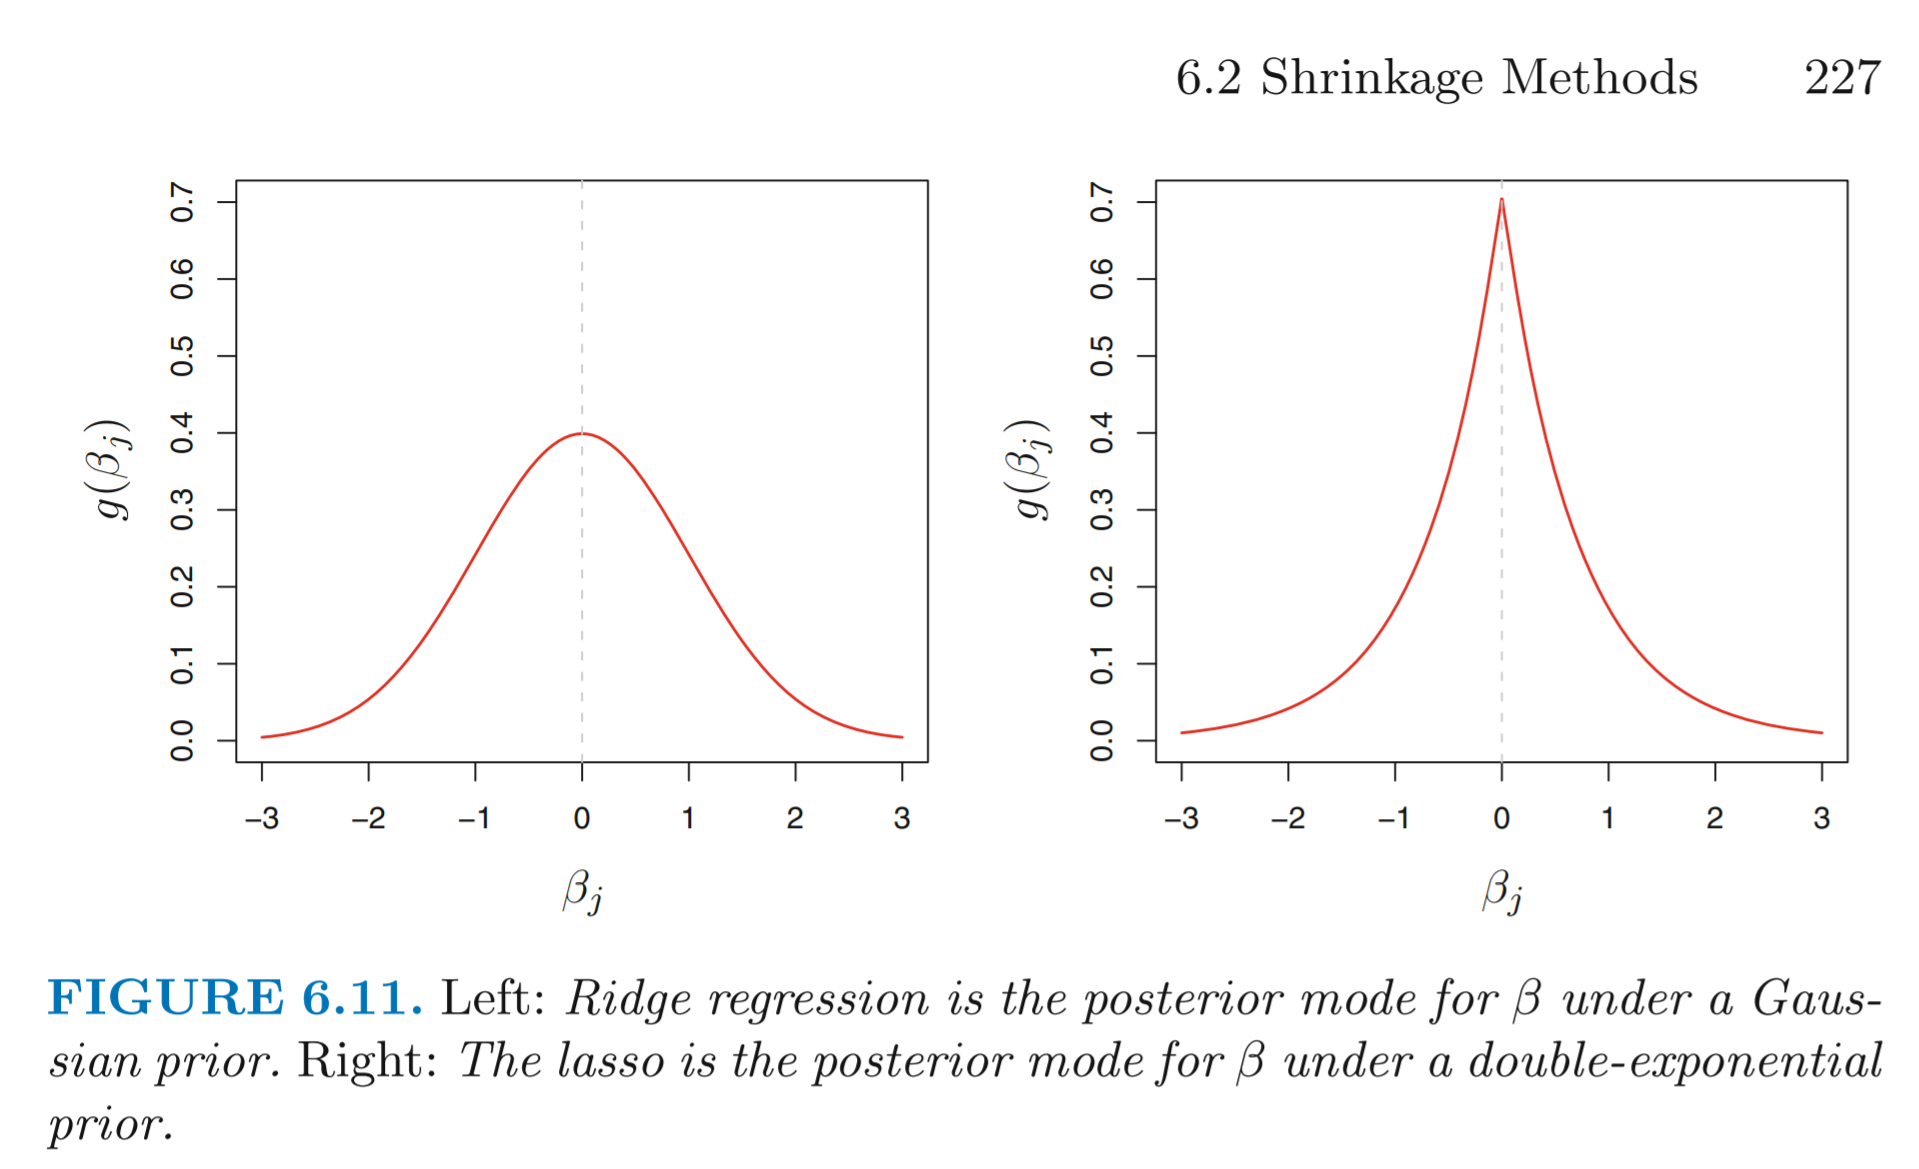

In [271]:
# initiating the model
dtr = DecisionTreeRegressor(random_state = 64)

# Train the model
dtr.fit(x_tr, y_tr)

# Make predictions

y_pred_tr = dtr.predict(x_tr)
y_pred_ts = dtr.predict(x_ts)

### Evaluation

In [272]:
mean_squared_error(y_tr, y_pred_tr)

0.0

In [280]:
np.sqrt(mean_squared_error(y_ts, y_pred_ts))

2803.294974438059

In [274]:
r2_score(y_ts, y_pred_ts)

0.8984751228678035

In [276]:
r2_score(y_tr, y_pred_tr)

1.0

In [281]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [283]:
ts = df[df.price == 5118.000000]

In [284]:
_x = ts.drop(columns=target)
_y = ts[target]

In [285]:
dtr.predict(_x)

array([5118.])

In [288]:
y_ts.describe()

,price
count,62.000000
mean,14414.540323
std,8869.793099
min,5348.000000
25%,7830.250000
50%,11557.500000
75%,18100.000000
max,45400.000000


In [289]:
y_ts[y_ts.price == 5348.000000]

,price
150,5348.0


In [295]:
_x = x_ts.loc[150]

In [297]:
dtr.predict([_x])

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6338.])

### Model 2

In [306]:
# initiating the model
dtr1 = DecisionTreeRegressor(criterion = 'absolute_error', random_state = 64)

# Train the model
dtr1.fit(x_tr, y_tr)

# Make predictions

y_pred_tr = dtr1.predict(x_tr)
y_pred_ts = dtr1.predict(x_ts)

### Evaluation

In [322]:
mean_absolute_error(y_tr, y_pred_tr)

0.0

In [323]:
mean_absolute_error(y_ts, y_pred_ts)

1973.991935483871

In [307]:
mean_squared_error(y_tr, y_pred_tr)

0.0

In [309]:
np.sqrt(mean_squared_error(y_ts, y_pred_ts))

2741.5350546081227

In [310]:
r2_score(y_ts, y_pred_ts)

0.9028992728053582

In [311]:
r2_score(y_tr, y_pred_tr)

1.0

In [312]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [313]:
ts = df[df.price == 5118.000000]

In [314]:
_x = ts.drop(columns=target)
_y = ts[target]

In [315]:
dtr.predict(_x)

array([5118.])

In [316]:
y_ts.describe()

,price
count,62.000000
mean,14414.540323
std,8869.793099
min,5348.000000
25%,7830.250000
50%,11557.500000
75%,18100.000000
max,45400.000000


In [317]:
y_ts[y_ts.price == 5348.000000]

,price
150,5348.0


In [318]:
_x = x_ts.loc[150]

In [320]:
dtr1.predict([_x])

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5572.])

In [ ]:
5348, 5572

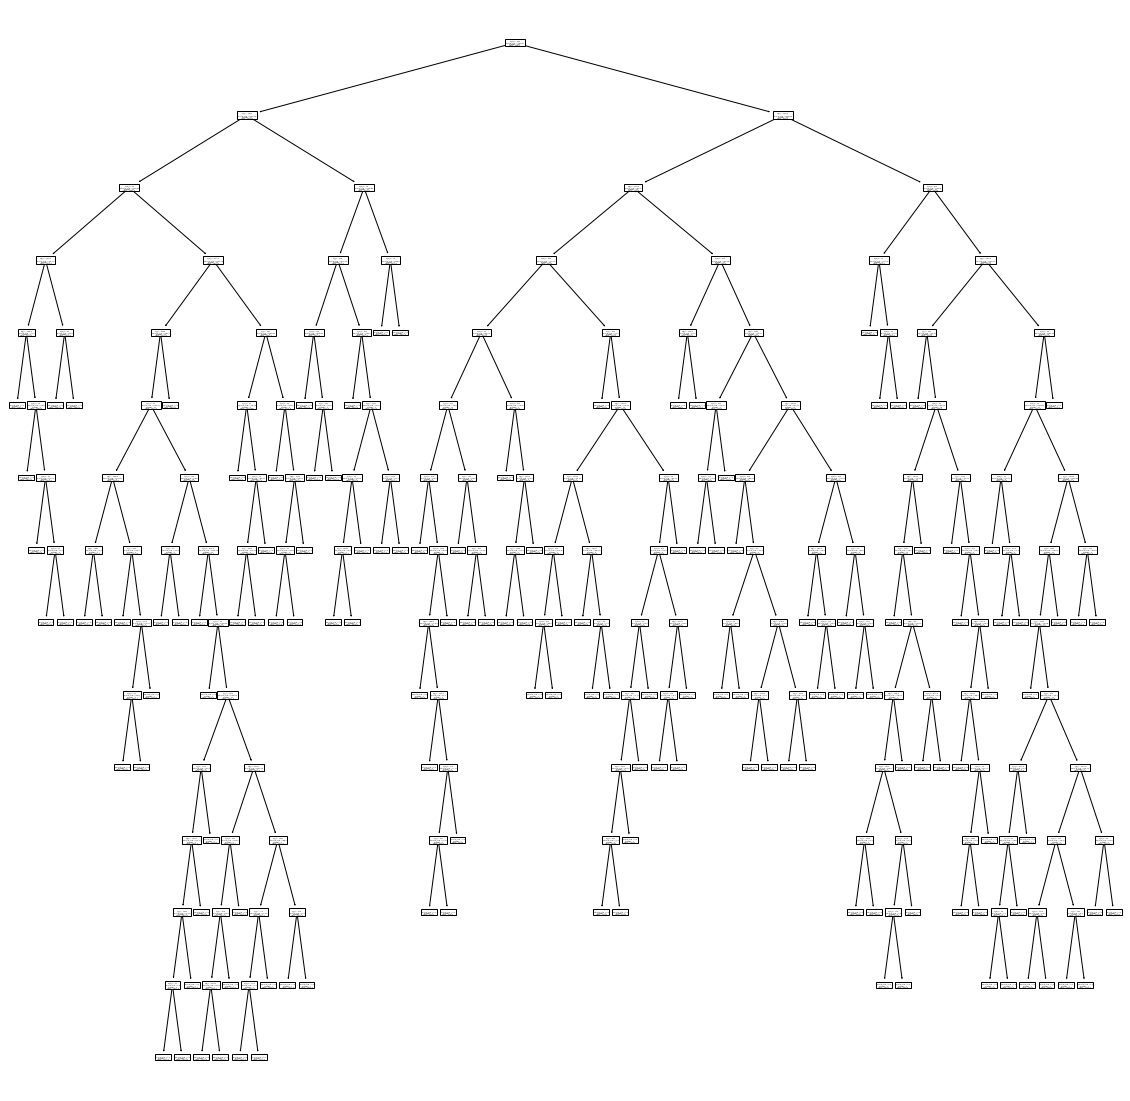

In [326]:
plt.figure(figsize=(20,20))
plot_tree(dtr1)
plt.show()

## Optimizing the dtr model

In [331]:
# Instantiating the base estimator
base_estimator = DecisionTreeRegressor(criterion = 'absolute_error', 
                                       random_state = 64)

# Setting up the configuration for the dtr model tuning
params_grid = {'splitter': ["best", "random"], 
               'max_depth' : np.arange(7, 17, 2), 
               'min_samples_split': np.arange(10,40,3), 
               'min_samples_leaf' : np.arange(5,10)}

# Setting up the tuner object
tuner = RandomizedSearchCV(estimator = base_estimator, 
                           param_distributions = params_grid, 
                           cv = 5, 
                           n_iter = 100, 
                           n_jobs = -1, 
                           return_train_score = True, 
                           random_state = 64, 
                           verbose = 1)

# Searching for the best possible model
tuner.fit(x_tr, y_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                   random_state=64),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 7,  9, 11, 13, 15]),
                                        'min_samples_leaf': array([5, 6, 7, 8, 9]),
                                        'min_samples_split': array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37]),
                                        'splitter': ['best', 'random']},
                   random_state=64, return_train_score=True, verbose=1)

In [332]:
tuner.best_score_

0.8192765932203459

In [333]:
tuner.best_params_

{'splitter': 'best',
 'min_samples_split': 25,
 'min_samples_leaf': 7,
 'max_depth': 9}

In [334]:
pd.DataFrame(tuner.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021083,0.003048,0.004150,0.000906,best,10,7,11,"{'splitter': 'best', 'min_samples_split': 10, ...",0.864455,...,0.806345,0.091136,27,0.919323,0.922328,0.926978,0.917835,0.906758,0.918644,0.006715
1,0.013001,0.004497,0.003280,0.003188,best,10,7,13,"{'splitter': 'best', 'min_samples_split': 10, ...",0.864455,...,0.806345,0.091136,27,0.919323,0.922328,0.926978,0.917835,0.906758,0.918644,0.006715
2,0.005183,0.000780,0.001706,0.000979,random,31,5,11,"{'splitter': 'random', 'min_samples_split': 31...",0.620543,...,0.605131,0.167678,63,0.640246,0.783008,0.679455,0.649734,0.699670,0.690423,0.050894
3,0.005695,0.002527,0.002086,0.000880,random,34,7,7,"{'splitter': 'random', 'min_samples_split': 34...",0.620543,...,0.522109,0.086389,91,0.640246,0.767757,0.517554,0.611879,0.467339,0.600955,0.104207
4,0.005710,0.001864,0.001513,0.000824,best,16,7,11,"{'splitter': 'best', 'min_samples_split': 16, ...",0.863983,...,0.808569,0.087973,23,0.914669,0.921986,0.925060,0.916533,0.906758,0.917001,0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001718,0.000054,0.000739,0.000014,random,31,7,7,"{'splitter': 'random', 'min_samples_split': 31...",0.620543,...,0.556276,0.091502,85,0.640246,0.784660,0.679455,0.611879,0.517087,0.646665,0.087361
96,0.003550,0.001746,0.001234,0.000752,best,13,9,13,"{'splitter': 'best', 'min_samples_split': 13, ...",0.879044,...,0.587094,0.547645,77,0.900032,0.794807,0.914867,0.915098,0.892055,0.883372,0.045156
97,0.003409,0.000740,0.000985,0.000350,best,19,7,11,"{'splitter': 'best', 'min_samples_split': 19, ...",0.865048,...,0.816389,0.091449,7,0.909839,0.921986,0.922843,0.907883,0.901329,0.912776,0.008364
98,0.001722,0.000036,0.000741,0.000016,random,19,8,11,"{'splitter': 'random', 'min_samples_split': 19...",0.602389,...,0.636741,0.189030,52,0.648100,0.798442,0.681477,0.808000,0.646399,0.716484,0.071981
